In [132]:
#------- Sesion 3
# 20 /10/ 2020 


import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from scipy.integrate import odeint
import pytwalk as twalk

sns.set_theme(style="darkgrid") 

In [134]:
# Yt incidencia
yt=pd.read_csv("SEIR.csv", delimiter=";")
t=np.arange(0,28,1 )

yt=yt.iloc[:,1]

yt = (yt.to_numpy())

In [ ]:
def seiyr(y,t, beta, kappa, gamma):
  S,E,I,Y,R=y
  dSdt=-(beta/N)*I*S
  dEdt = (beta/N)*I*S - kappa*E 
  dIdt= kappa*E- gamma*I #prevalencia
  dYdt= kappa*E #incidencia
  dRdt= gamma*I
  return [dSdt, dEdt, dIdt, dYdt, dRdt]


Text(0.5, 1.0, 'Incidencia semanal')

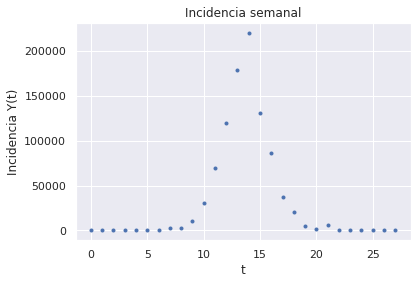

In [135]:
plt.plot(t,yt, '.')
plt.xlabel('t')
plt.ylabel('Incidencia Y(t)')
plt.title('Incidencia semanal')

Text(0.5, 1.0, 'Incidencia semanal')

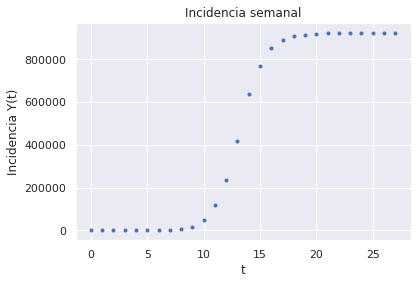

In [136]:
plt.plot(t, np.cumsum(yt), '.')
plt.xlabel('t')
plt.ylabel('Incidencia Y(t)')
plt.title('Incidencia semanal')

In [137]:
# SIR

#theta=(beta, kappa, gamma   )

N = 1e6

def seiyr(y,t, beta, kappa, gamma):
  S,E,I,Y,R=y
  dSdt=-(beta/N)*I*S
  dEdt = (beta/N)*I*S - kappa*E 
  dIdt= kappa*E- gamma*I
  dYdt= kappa*E
  dRdt= gamma*I
  return [dSdt, dEdt, dIdt, dYdt, dRdt]


####log prior########
def logprior(theta):
    beta, kappa, gamma= theta        
    if(  beta>a and beta<b and kappa>e and kappa<f and gamma>i and gamma<j):
        t1=(c-1)*np.log( beta-a )+ (d-1)*np.log(b-beta) 
        t2=(g-1)*np.log(kappa-e )+ (h-1)*np.log(f- kappa)
        t3=(k-1)*np.log(gamma-i )+ (l-1)*np.log(j- gamma)
        return t1+t2+t3
    else:
        return -np.inf

  
#log Likelihood
def logL(theta):
  beta, kappa, gamma=theta
  S0=N-1
  E0=0
  I0=1
  Y0=1
  R0=0
  
  y0=[S0, E0, I0, Y0, R0] #condicion inicial 
  sol = odeint(seiyr, y0, t, args=(beta,kappa, gamma))
  St, Et,It, Yt, Rt= sol[:,0], sol[:,1], sol[:,2], sol[:,3], sol[:,4]

  diffYt=np.append( Yt[0]  ,np.diff(Yt)) 
  temp=-np.sum( diffYt  )+np.sum(yt*np.log(diffYt)) #yt_i ~ Pois ( diffYt(beta, kappa, gamma)(t_i) )
  
  return temp

#Energia U=-log Posterior
def U(theta):
  #return -(logL(theta)+logPrior(theta))
  return -(logL(theta)) # uniform prior 


#--- Funciones auxiliares

def tplot(x, variable ): #funcion para ver trazas
  plt.plot(x)
  plt.xlabel('t')
  plt.ylabel( variable)
  plt.title('traceplot')

def histmh(x, variable,  flag=False): #funcion para ver histogramas 
  sns.displot(x, kde=flag, bins=15)  
  plt.xlabel('x')
  plt.title('Histograma de '+ variable)




In [51]:

def p0(): #initial point function for the t walk
  beta=scipy.stats.uniform.rvs( loc=0,scale=5, size=1)
  kappa=scipy.stats.uniform.rvs( loc=0,scale=5, size=1)
  gamma=scipy.stats.uniform.rvs( loc=0,scale=5, size=1)

  return np.array([ beta[0], kappa[0], gamma[0]])

def supp(theta): #funcion de soporte , el t-walk lo va proponiendo
  beta, kappa, gamma=theta
  if(beta>0 and kappa and gamma>0):
    return True
  else:
    return False

In [53]:

#--- t walk

T=500000 #number of iterations

x0=p0() #punto inicial 1
xp0=p0() #punto inicial 2

#n= dimension
# U funcion de energia  -log P(theta| y)
# Supp funcion de soporte

tchain = twalk.pytwalk( n=3, U=U, Supp=supp )
tchain.Run( T=T , x0= x0 , xp0= xp0)

pytwalk: Running the twalk with 500000 iterations .  Tue, 20 Oct 2020, 21:52:23.
       Finish by Tue, 20 Oct 2020, 22:47.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log
/content/pytwalk.py:310: RuntimeWarning: overflow encountered in exp
  A = exp(up - up_prop)
/content/pytwalk.py:324: RuntimeWarning: overflow encountered in exp
  A = exp(u - u_prop)
/content/pytwalk.py:349: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) +  (self.nphi-2)*log(beta))
/content/pytwalk.py:420: RuntimeWarning: overflow encountered in exp
  A = exp((up - up_prop) + (W1 - W2))


pytwalk:      10240 iterations so far. Finish by Tue, 20 Oct 2020, 22:18.
pytwalk:      29696 iterations so far. Finish by Tue, 20 Oct 2020, 22:19.
pytwalk:      66560 iterations so far. Finish by Tue, 20 Oct 2020, 22:19.
pytwalk:     140288 iterations so far. Finish by Tue, 20 Oct 2020, 22:19.
pytwalk:     286720 iterations so far. Finish by Tue, 20 Oct 2020, 22:19.
pytwalk: finished, Tue, 20 Oct 2020, 22:19:42.


1

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.03615639 0.16261075 0.00690148 0.03242854]
Global acceptance rate: 0.09805
AutoMaxlag: maxlag= 273.
Integrated Autocorrelation Time:    84.8, IAT/n:    28.3
AutoMaxlag: maxlag= 273.


matrix([[84.80861206]])

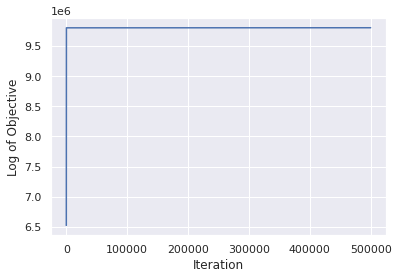

In [138]:
tchain.Ana()
tchain.IAT() #tiempo de autocorrelacion integrado
#que tan rapido mi cadena produce obs independientes?


In [139]:
#Tamano de muestra efectivo

iat=84.8
print('Tamano de muestra efectivo: ', T/ iat ) #cuantas de tus obs son independientes



Tamano de muestra efectivo:  5896.22641509434


In [140]:
toutput=tchain.Output[:, 0:3 ]

beta=toutput[:,0]
kappa=toutput[:,1]
gamma=toutput[:,2]


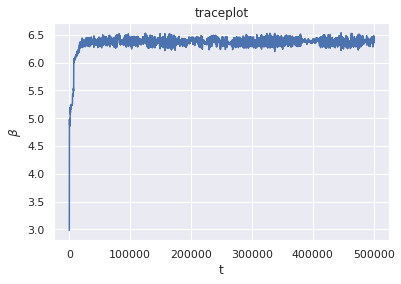

In [141]:
tplot(beta, r'$\beta$'  )

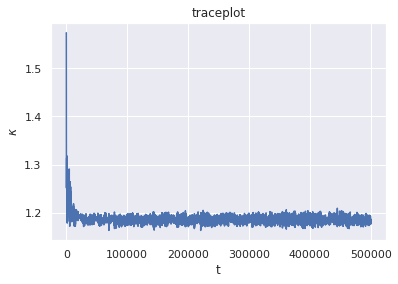

In [142]:
tplot(kappa, r'$\kappa$'  )

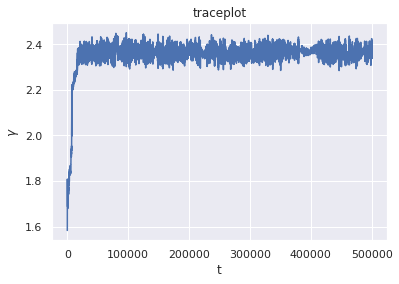

In [143]:
tplot(gamma, r'$\gamma$'  )

In [144]:
#burnin
bi=int(0.20*T)

beta=toutput[bi:,0]
kappa=toutput[bi:,1]
gamma=toutput[bi:,2]

r0=beta/gamma #calculando r0 

resultados={'beta': beta, 'kappa':kappa,'gamma':gamma, 'r0': r0 }
resultados=pd.DataFrame(resultados)

pd.DataFrame.describe(resultados)
#resultados.to_csv(index=False ) 

,beta,kappa,gamma,r0
count,400001.000000,400001.000000,400001.000000,400001.000000
mean,6.381182,1.186012,2.365922,2.697180
std,0.039680,0.005302,0.019711,0.009286
min,6.200162,1.163574,2.284207,2.659980
25%,6.354198,1.182364,2.352209,2.691110
50%,6.382975,1.186139,2.365757,2.697241
75%,6.409814,1.189803,2.379478,2.703410
max,6.538990,1.209545,2.444560,2.735536


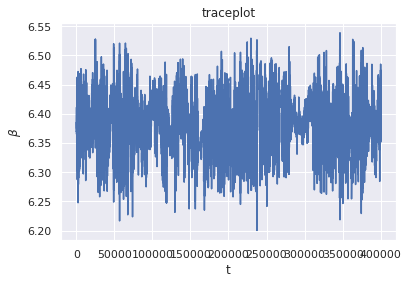

In [145]:
tplot(beta, r'$\beta$'  )

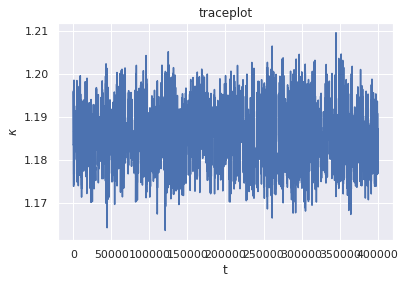

In [146]:
tplot(kappa, r'$\kappa$'  )

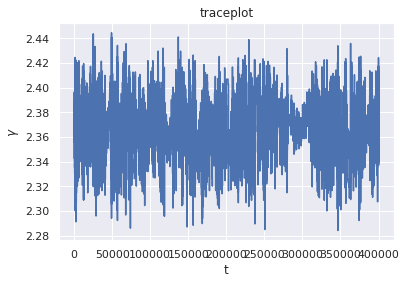

In [147]:
tplot(gamma, r'$\gamma$'  )

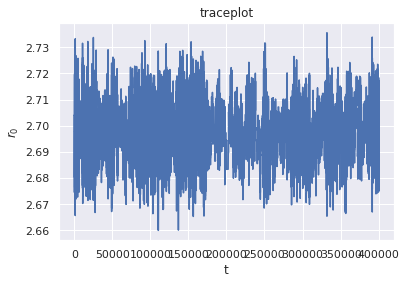

In [148]:
tplot(r0, r'$r_0$'  )

In [41]:
#resultados.to_csv('r.csv',index=False ) 

In [149]:
#Mediana posterior
medianas=pd.DataFrame.median(resultados)
print(medianas)

beta     6.382975
kappa    1.186139
gamma    2.365757
r0       2.697241
dtype: float64


In [150]:
pd.DataFrame.quantile(resultados, (0.025, 0.975))

,beta,kappa,gamma,r0
0.025,6.300116,1.175633,2.326370,2.678629
0.975,6.458604,1.196122,2.405223,2.714316


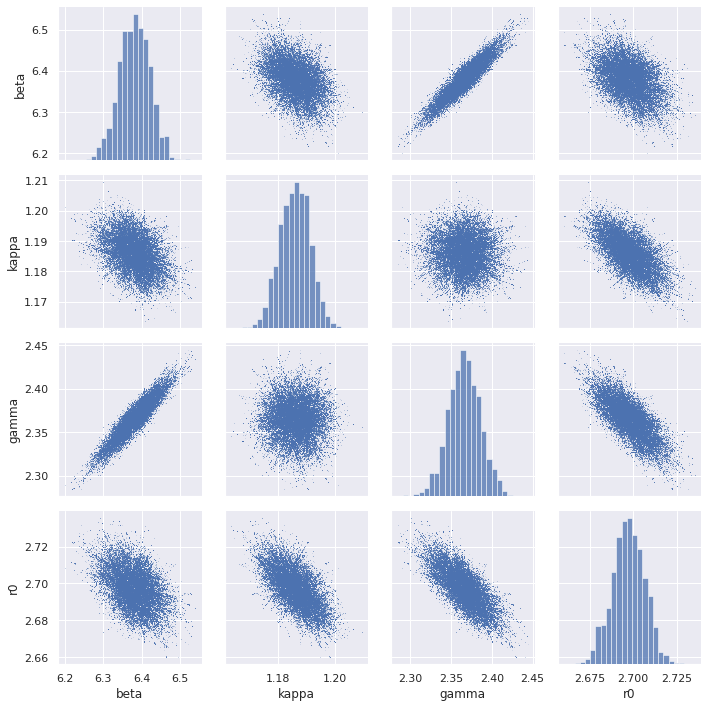

In [151]:
sns.pairplot(resultados, markers='.', plot_kws=dict(s=0.5, edgecolor="b"),diag_kws=dict(bins=25) )
plt.tight_layout()
#plt.savefig('twpairplot.png', dpi=500)

In [153]:
from scipy import optimize

#MAP: Maximum a posteriori

#L1: mediana
#L2: media
#0-1: MAP 

map1=optimize.minimize( U ,  medianas[0:3]  ,method='bfgs', tol=1e-5) #Broyden Fletcher
map1=map1['x']
print('map1: ', map1)


map1:  [6.38211382 1.18570535 2.36603429]


In [154]:

def solveseiyr(t, beta, kappa,  gamma):
  S0=N-1
  E0=0
  I0=1
  Y0=0
  R0=0

  y0=[S0, E0, I0, Y0, R0] #condicion inicial 
  sol = odeint(seiyr, y0, t, args=(beta,kappa, gamma))
  return sol

Text(0, 0.5, 'Y(t)')

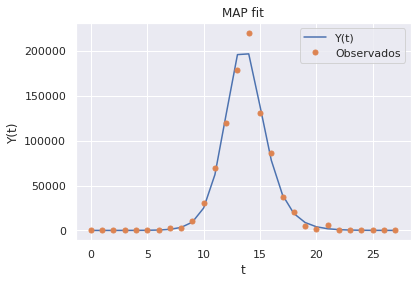

In [155]:
msol=solveseiyr( t, map1[0], map1[1], map1[2] )

mSt, mEt,mIt, mYt, mRt= msol[:,0], msol[:,1], msol[:,2], msol[:,3], msol[:,4]
  
diffmYt=np.append( mYt[0]  ,np.diff(mYt)) 
  
plt.plot(t,diffmYt, label='Y(t)'  ) #Y(t)
plt.plot(t, yt, '.', label='Observados', markersize=10)
plt.legend()
plt.title('MAP fit')
plt.xlabel('t')
plt.ylabel( 'Y(t)') 

Text(0, 0.5, 'S(t)')

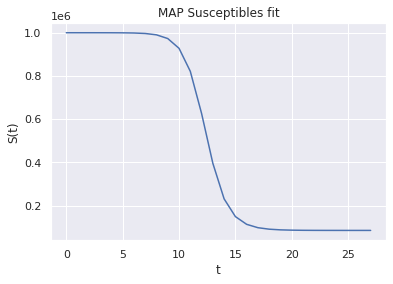

In [157]:
plt.plot(t, mSt )
plt.title('MAP Susceptibles fit')
plt.xlabel('t')
plt.ylabel( 'S(t)') 

Text(0, 0.5, 'E(t)')

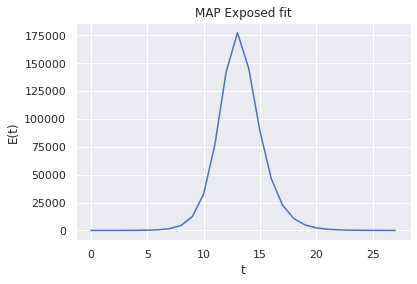

In [158]:
plt.plot(t, mEt )
plt.title('MAP Exposed fit')
plt.xlabel('t')
plt.ylabel( 'E(t)') 

Text(0, 0.5, 'I(t)')

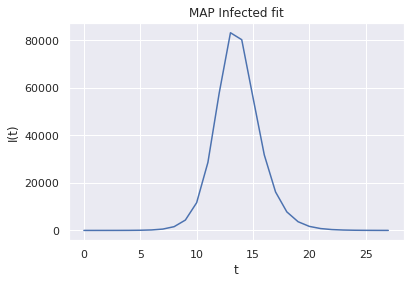

In [162]:
plt.plot(t, mIt )
plt.title('MAP Infected fit')
plt.xlabel('t')
plt.ylabel( 'I(t)') 

Text(0, 0.5, 'Y(t)')

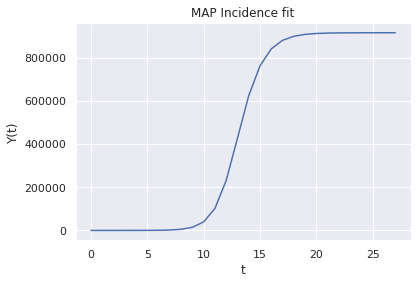

In [160]:
plt.plot(t, mYt )
plt.title('MAP Incidence fit')
plt.xlabel('t')
plt.ylabel( 'Y(t)') 

Text(0, 0.5, 'R(t)')

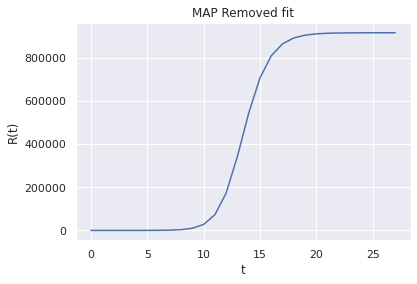

In [161]:
plt.plot(t, mRt )
plt.title('MAP Removed fit')
plt.xlabel('t')
plt.ylabel( 'R(t)') 

In [163]:
#------------ Posterior Predictive Curves

#--- La predictiva (????)
#https://people.stat.sc.edu/Hitchcock/stat535slidesday18.pdf
# https://stats.stackexchange.com/questions/185311/why-does-sampling-from-the-posterior-predictive-distribution-px-new-mid-x-1

#  p( y^* | y  )= \int_{\Theta} p(y^*| y, \theta) p(\theta | y)  d\theta

#Funcion auxiliar para generar predictivas

def predobs( beta, kappa, gamma, tup=28  ,sample_size=150 ):
    L=len(beta)
    obs=np.zeros([ sample_size  , tup]) 

    Sts=np.zeros([ sample_size  , tup]) 
    Ets=np.zeros([ sample_size  , tup]) 
    Its=np.zeros([ sample_size  , tup]) 
    Yts=np.zeros([ sample_size  , tup]) 
    Rts=np.zeros([ sample_size  , tup]) 
    
    #ts=np.arange(1,tup+1, 1)
    ts=t
    #which observations to take into account for the predictive
    indexes=np.random.choice(a = np.arange( 0, L )   , size = sample_size, replace = False)
    
    sbetas=beta[indexes]
    skappas= kappa[indexes]
    sgammas= gamma[indexes]
    
    for i in range(sample_size ):
        sol=solveseiyr(ts,sbetas[i], skappas[i], sgammas[i])
        Sts[i]=sol[ :,0]
        Ets[i]=sol[ :,1]
        Its[i]=sol[ :,2]
        Yts[i]=sol[ :,3]
        Rts[i]=sol[ :,4]
        temp=Yts[i]
        diffYts=np.append( temp[0]  ,np.diff(temp)) 
        obs[i]=scipy.stats.poisson.rvs( diffYts ) #y_t ~ Poisson(I_t(theta))
        
    return Sts, Ets, Its, Yts, Rts,  obs


In [164]:
# Distribucion predictiva
Sts, Ets, Its, Yts, Rts, obspred=predobs( beta, kappa, gamma, sample_size=150)

indexes=np.random.choice(a = np.arange( 0,  Sts.shape[0] ), size =150, replace = False)
obs_samples=obspred[indexes]



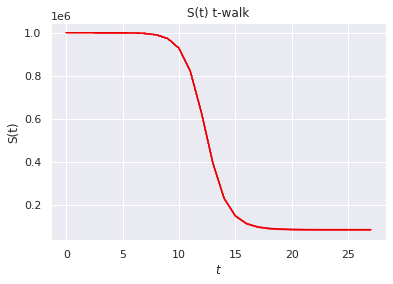

In [165]:
for i in range( len(obs_samples )  ):
    plt.plot(t, Sts[i], color='red' , alpha=0.01 )
plt.xlabel( r'$t$' )
plt.ylabel( r'S(t)' )
plt.title( 'S(t) t-walk' )
plt.savefig( 'predSt.pdf', dpi=500  )
plt.show()

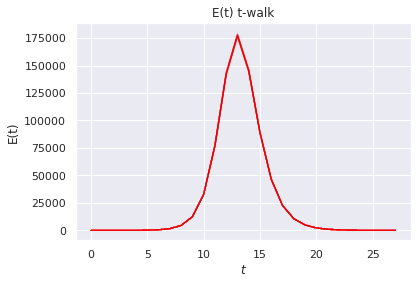

In [172]:
for i in range( len(obs_samples )  ):
    plt.plot(t, Ets[i], color='red' , alpha=0.01 )
plt.xlabel( r'$t$' )
plt.ylabel( r'E(t)' )
plt.title( 'E(t) t-walk' )
plt.savefig( 'predEt.pdf', dpi=500  )
plt.show()

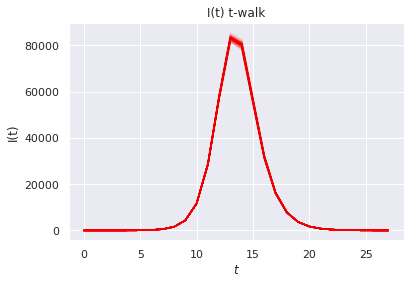

In [167]:
for i in range( len(obs_samples )  ):
    plt.plot(t, Its[i], color='red' , alpha=0.05 )
plt.xlabel( r'$t$' )
plt.ylabel( r'I(t)' )
plt.title( 'I(t) t-walk' )
plt.savefig( 'predIt.pdf', dpi=500  )
plt.show()

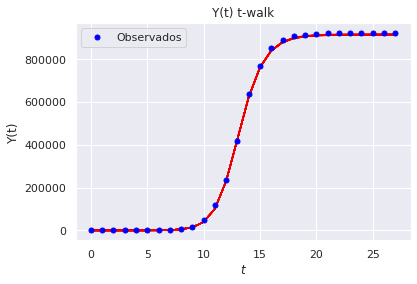

In [174]:
for i in range( len(obs_samples )  ):
    plt.plot(t, Yts[i], color='red' , alpha=0.05 )
plt.plot(t, np.cumsum( yt), '.', color='blue' , markersize=10,label='Observados' )
plt.xlabel( r'$t$' )
plt.ylabel( r'Y(t)' )
plt.title( 'Y(t) t-walk' )
plt.legend()
plt.savefig( 'predYt1.pdf', dpi=500  )
plt.show()

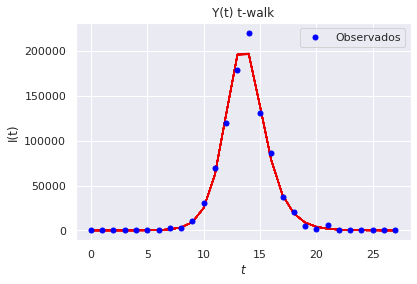

In [169]:
for i in range( len(obs_samples )  ):
    temp=Yts[i]
    temp=np.append( temp[0], np.diff(temp)   )
    plt.plot(t, temp, color='red' , alpha=0.05 )

plt.plot(t,  yt, '.', color='blue' , markersize=10,label='Observados' )
plt.xlabel( r'$t$' )
plt.ylabel( r'I(t)' )
plt.title( 'Y(t) t-walk' )
plt.legend()
plt.savefig( 'predYt2.pdf', dpi=500  )
plt.show()

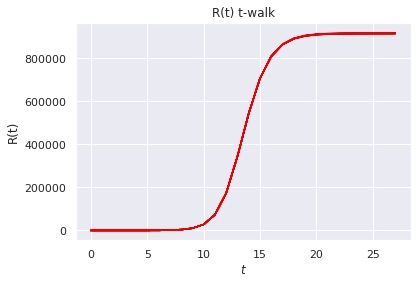

In [173]:
for i in range( len(obs_samples )  ):
    plt.plot(t, Rts[i], color='red' , alpha=0.05 )
plt.xlabel( r'$t$' )
plt.ylabel( r'R(t)' )
plt.title( 'R(t) t-walk' )
plt.savefig( 'predRt.pdf', dpi=500  )
plt.show()